In [1]:
%cd ../..

/home/eli/AnacondaProjects/combinators


In [2]:
import logging

import numpy as np
import probtorch
import torch

from examples.fep_control import fep_control
from combinators.model import active
from combinators.model import compose, foldable
from combinators.inference import importance
from combinators import utils

In [3]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [4]:
target = fep_control.MountainCarAgent(observation_dim=2, functional_dim=2, perceptual_dim=1, batch_shape=(10,), trainable=False)
proposal = fep_control.RecognitionAgent(functional_dim=2, perceptual_dim=1, action_dim=1, observation_dim=2, batch_shape=(10,),
                                        discrete_actions=False, name='MountainCarAgent', trainable=True)
agent = importance.propose(target, proposal)

In [5]:
episode = active.ActiveEpisode(agent, 'MountainCarContinuous-v0')

In [6]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [7]:
xi, trained_params, elbos = active.active_variational(episode, 100, lr=1e-3, log_estimator=True, patience=None)

06/28/2019 15:17:18 Episode length: 233
06/28/2019 15:17:19 ELBO=-1.86641968e+03 per step at epoch 1
06/28/2019 15:17:24 Episode length: 1000
06/28/2019 15:17:28 ELBO=-1.72887585e+03 per step at epoch 2
06/28/2019 15:17:30 Episode length: 482
06/28/2019 15:17:32 ELBO=-1.72407898e+03 per step at epoch 3
06/28/2019 15:17:35 Episode length: 616
06/28/2019 15:17:38 ELBO=-1.77447766e+03 per step at epoch 4
06/28/2019 15:17:38 Episode length: 170
06/28/2019 15:17:39 ELBO=-2.04024121e+03 per step at epoch 5
06/28/2019 15:17:43 Episode length: 946
06/28/2019 15:17:47 ELBO=-1.72717542e+03 per step at epoch 6
06/28/2019 15:17:50 Episode length: 707
06/28/2019 15:17:53 ELBO=-1.70503589e+03 per step at epoch 7
06/28/2019 15:17:56 Episode length: 658
06/28/2019 15:17:59 ELBO=-1.59411877e+03 per step at epoch 8
06/28/2019 15:18:01 Episode length: 408
06/28/2019 15:18:02 ELBO=-1.77763525e+03 per step at epoch 9
06/28/2019 15:18:04 Episode length: 493
06/28/2019 15:18:06 ELBO=-1.79776624e+03 per step 

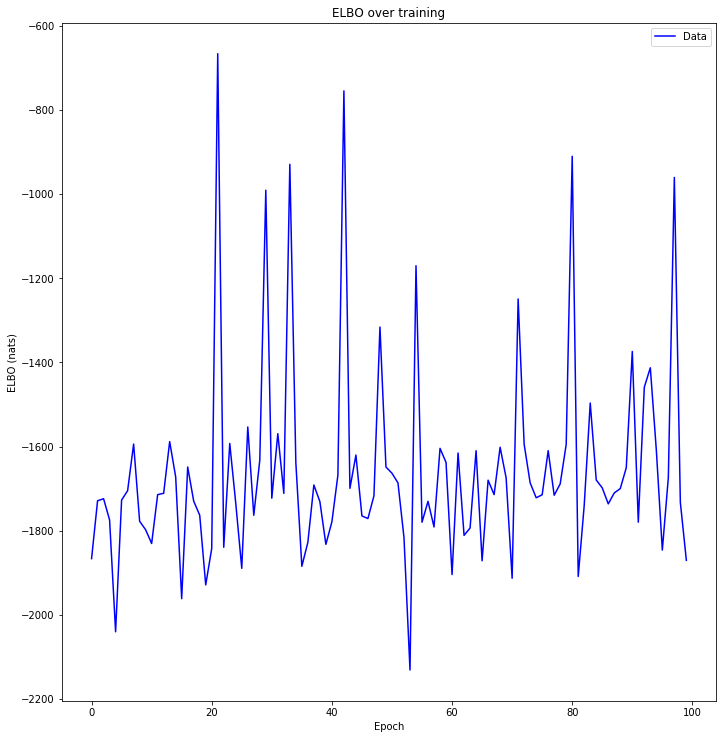

In [15]:
utils.plot_evidence_bounds(elbos[:, 0].cpu().detach().numpy())

In [16]:
(control, prediction, t), graph, log_weight = episode(render=True)

In [10]:
control

tensor([[1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658],
        [1.4658]], grad_fn=<ExpandBackward>)

In [11]:
prediction

{'loc': tensor([[-0.0841, -0.0699,  0.2696],
         [-0.0745, -0.0702,  0.2657],
         [-0.0435, -0.0653,  0.2884],
         [-0.0935, -0.0690,  0.2662],
         [-0.0649, -0.0704,  0.2702],
         [-0.0598, -0.0713,  0.2723],
         [-0.0449, -0.0644,  0.2624],
         [-0.0512, -0.0609,  0.2794],
         [-0.0735, -0.0717,  0.2674],
         [-0.0855, -0.0698,  0.2721]], grad_fn=<SelectBackward>),
 'scale': tensor([[0.7554, 0.6618, 1.0527],
         [0.7556, 0.6429, 1.0290],
         [0.7401, 0.6486, 1.1011],
         [0.7559, 0.6605, 1.0461],
         [0.7539, 0.6442, 1.0443],
         [0.7516, 0.6484, 1.0521],
         [0.7419, 0.6328, 1.0255],
         [0.7409, 0.6443, 1.0680],
         [0.7563, 0.6502, 1.0474],
         [0.7543, 0.6621, 1.0573]], grad_fn=<SoftplusBackward>)}

In [12]:
t

481

In [13]:
log_weight

tensor([  -806375.3750,   -807592.6250,   -806382.3125,   -806258.5000,
          -810097.7500,   -806266.1250,   -806290.0000,   -806275.6875,
        -67876376.0000,   -806705.6875], grad_fn=<AddBackward0>)

In [14]:
torch.save(agent, 'examples/fep_control/fep_mountain_car_agent.dat')